这是一份用户消费行为的分析报告  
数据来源于网上，是用户在一家CD网站上的消费记录

In [19]:
import pandas as pd  
import numpy as np 

columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')

+ user_id：用户ID  
- order_dt:购买日期  
- order_prodects：购买产品数  
- order_amount：购买金额

In [20]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [21]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


+ 大部分订单只消费了少量商品（平均2.4），有一定值干扰  
+ 用户的消费金额比较稳定，平均消费35元，中位数在35元，有一定极值的干扰

In [22]:
df['order_dt']=pd.to_datetime(df.order_dt,format="%Y%m%d")
df['month']=df.order_dt.values.astype('datetime64[M]')

- 对时间进行解析，一开始默认的格式是 int64的，可以用 df.info() 来查看,默认会是 datetime64[ns] 类型，后面中括号表示 时间间隔是 ns
- 下面是对 order_dt 列（取values），转换类型为datetime64[M]，默认就会是每月的第一天了，同理设置为[Y]就是每年的1月1日，然后生成新的一列 month

## 1.进行用户消费趋势的分析（按月）
- 每月的消费总金额
- 每月的消费次数
- 每月的产品购买量
- 每月的消费人数

In [23]:
grouped_month=df.groupby('month')
order_month_amount=grouped_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

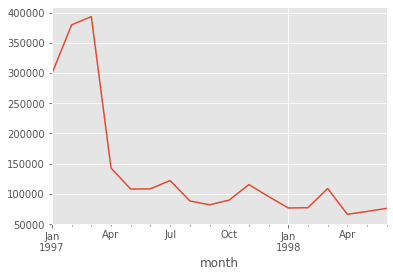

In [24]:
#加载数据可视化包
import matplotlib.pyplot as plt
#可视化显示在页面
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')
order_month_amount.plot()

由上图可知，消费金额在前三个月达到最高峰，后续消费较为稳定，有轻微下降趋势

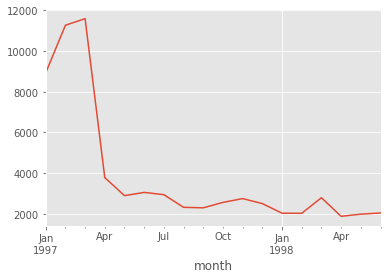

In [25]:
grouped_month.user_id.count().plot()

In [26]:
type(grouped_month.user_id.count())

pandas.core.series.Series

前三个月消费订单人数在10000笔作于，后续月份的平均消费人数则在2500人

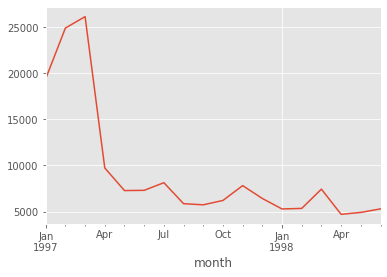

In [27]:
grouped_month.order_products.sum().plot()

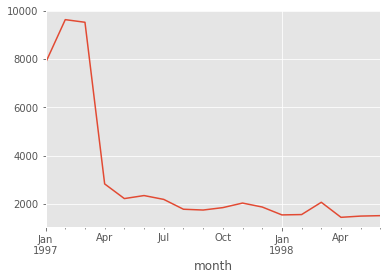

In [28]:
# 这里 x 其实是一个数组，是每月分组的用户id，去重后求数组的 len 长度就代表每月的用户数
df.groupby('month').user_id.apply(lambda x:len(x.drop_duplicates())).plot()

去重的方法有多种，这里也可以使用数据库思想，df.groupby(['month','user_id']).count().reset_index()  
每月消费人数低于每月消费次数，但差异不大  
前三个月每月的消费人数在8000-10000之间，后续月份，平均消费人数在2000不到

In [29]:
df.groupby(['month','user_id']).count().reset_index()

,month,user_id,order_dt,order_products,order_amount
0,1997-01-01,1,1,1,1
1,1997-01-01,2,2,2,2
2,1997-01-01,3,1,1,1
3,1997-01-01,4,2,2,2
4,1997-01-01,5,2,2,2
...,...,...,...,...,...
55374,1998-06-01,23444,1,1,1
55375,1998-06-01,23489,1,1,1
55376,1998-06-01,23513,1,1,1
55377,1998-06-01,23555,1,1,1


In [30]:
# 上面进行的汇总分析，其实可以用数据透视的方法更快实现，一次性求出结果
df.pivot_table(index='month',
              values=['order_products','order_amount','user_id'],
              aggfunc={'order_products':'sum',
                      'order_amount':'sum',
                      'user_id':'count'}).head()

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


#### 练习：
1 每月用户平均消费金额的趋势
  df.groupby("month").order_amount.mean().plot()

2 每月用户平均消费次数的趋势

In [31]:
times = df.groupby('month').user_id.count()
person_num = df.groupby('month').user_id.apply(lambda x: len(x.drop_duplicates()))
times/person_num

month
1997-01-01    1.137905
1997-02-01    1.170144
1997-03-01    1.217766
1997-04-01    1.339830
1997-05-01    1.307588
1997-06-01    1.305686
1997-07-01    1.349541
1997-08-01    1.309255
1997-09-01    1.320299
1997-10-01    1.393148
1997-11-01    1.356016
1997-12-01    1.343348
1998-01-01    1.322056
1998-02-01    1.306254
1998-03-01    1.355825
1998-04-01    1.306889
1998-05-01    1.334005
1998-06-01    1.356574
Name: user_id, dtype: float64

## 2.用户个体消费分析
- 用户消费金额，消费次数的描述统计：describe()
- 用户消费金额和消费次数的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [32]:
df.columns

Index(['user_id', 'order_dt', 'order_products', 'order_amount', 'month'], dtype='object')

In [33]:
grouped_user=df.groupby('user_id')

In [34]:
# 用户消费金额，消费次数的描述统计：describe()
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


##### 分析：
- 用户平均购买了7张CD，但是中位值只有3，说明小部分用户购买了大量的CD
- 用户平均消费106元，中位值有43，判断同上，有极值干扰

### 用户消费金额和消费的散点图

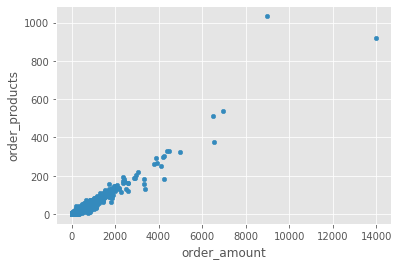

In [35]:
grouped_user.sum().plot.scatter(x='order_amount',y='order_products')
#等同于：
#grouped_user.sum().plot(x="order_amount", y="order_products", kind="scatter")

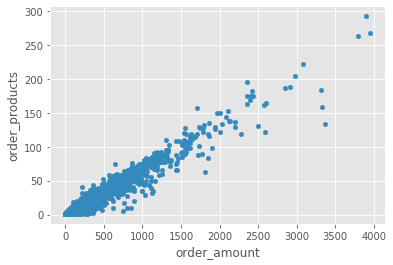

In [36]:
# 过滤极值
grouped_user.sum().query('order_amount<4000').plot.scatter(x='order_amount',y='order_products')

#### 消费金额的分布图

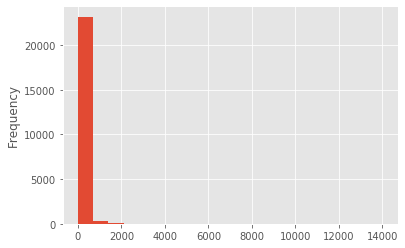

In [37]:
# 直方图，分为20块
grouped_user.sum().order_amount.plot.hist(bins=20)

分析：

从直方图可知，用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断，可以使用过滤操作排除异常

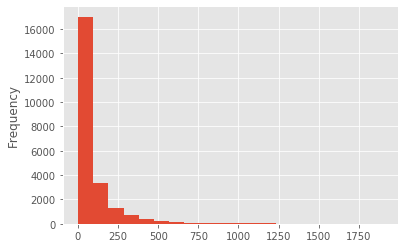

In [38]:
# 直方图，分为20块，过滤买了大量商品的订单
grouped_user.sum().query('order_products<100').order_amount.plot.hist(bins=20)

使用切比雪夫定理过滤掉异常值，因为切比雪夫定理说明，95%的数据都分布在5个标准差之内，剩下5%的极值就不要了

#### 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额度）

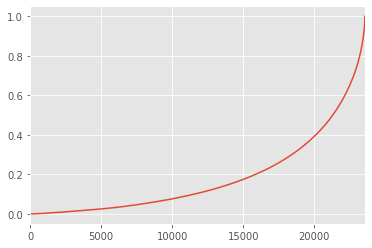

In [39]:
# cumsum 是求累加值
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())

# 这里 reset_index() 是为了得到一个自然数的x行标签，表示的就是人数，如果不用这个方法，图很难看。
# 下面的图就可以看出来多少个少占多少百分比
user_cumsum.reset_index().order_amount.plot()

按照用户消费金额进行升序排序，由图可以知道50%的用户仅贡献了15%的消费额度，而排名前5000的用户就贡献了40%的消费额度

## 3.用户消费行为
- 用户第一次消费（首购）
- 用户最后一次消费
- 新老客户消费比
 - 多少用户仅消费一次
 - 每月新客占比
- 用户分层
 - RFM模型
 - 新、老、活跃、回流、流失
- 用户购买周期（按订单）
 - 用户消费周期描述
 - 用户消费周期分布
- 用户生命周期（按第一次和最后一次消费）
 -用户生命周期描述
 - 用户生命周期分布

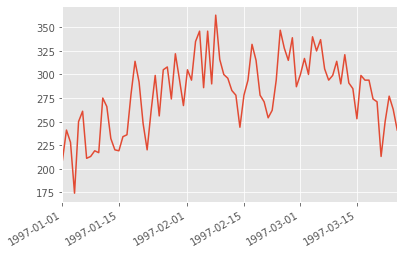

In [21]:
# 得到最小的日期，然后统计一下各个日期的个数
grouped_user.min().order_dt.value_counts().plot()

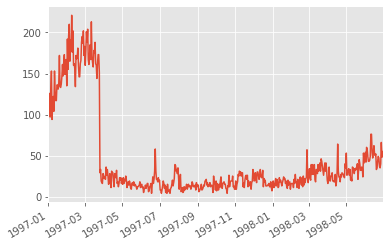

In [22]:
# 得到最大的日期，然后统计一下各个日期的个数，得到最后一次消费的情况，用户流失
grouped_user.max().order_dt.value_counts().plot()

断崖式下跌很正常：可以理解用户流失比例基本一致，一开始用户迅猛增长数量比较多流失的也比较多，后面没有用户 
用户最后一次购买的分布比第一次分布广  
大部分最后一次购买，集中在前三个月，说明很多用户购买了一次后就不再进行购买  
随着时间的递增，最后一次购买数量也在递增，消费呈现流失上升的状况（这也是正常，随着时间的增长，可能运营每跟上，或者用户忠诚度下降了）

In [23]:
#新老客消费比
# 得到第一次和最后yc次消费情况，如果 min、max 日期相同，说明只消费了一次
user_life=grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [24]:
# 统计只消费了一次的用户
(user_life['min']==user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

有一半的用户，只消费了一次

In [25]:
# 用户分层
# 画 RFM，先对原始数据进行透视
rfm=df.pivot_table(index='user_id',
                  values=['order_products','order_amount','order_dt'],
                  aggfunc={'order_dt':'max',
                          'order_amount':'sum',
                          'order_products':'sum'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [26]:
# 得到最近一次消费，一般是计算 today 距离最近一次消费，这里因为时间太久远，就随便用的max值
# 数值越大就越久远，分子得到的是一些天数类似 545 days（因为是时间格式相减），处以一个单位，就不会有单位了只留下数值
rfm['R']= -(rfm.order_dt - rfm.order_dt.max())/np.timedelta64(1,'D')
# 重命名，也就是 R：最后一次消费距今天数，F：消费总金额 ，M：消费总产品数
# R ：消费时间  F：消费金额  M：消费频次
rfm.rename(columns={'order_products':"F",'order_amount':'M'},inplace=True)

In [27]:
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [28]:
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    # level 的类型是 series，index 是 R、F、M
#     print(type(level))
#     print(level.index)
    label=level.R + level.F + level.M
    d={
        # R 为1 表示离均值较远即时间很久，F为1 表示 消费金额比较多，M 为1 表示消费频次比较多，所以是重要价值客户
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户',
    }
    result=d[label]
    return result

# 注意这里是要一行行的传递进来，所以 axis=1，传递一行得到一个 111，然后匹配返回一个值
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

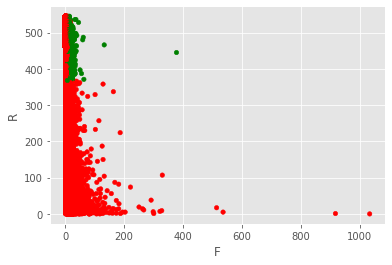

In [29]:
rfm.loc[rfm.label=='重要价值客户','color']='g'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
rfm.plot.scatter('F','R',c=rfm.color)

In [30]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,438291.81,29346,6951815.0
一般挽留客户,196971.23,13977,591108.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,33028.40,1263,114482.0
重要挽留客户,45785.01,2023,56636.0


从RFM 分层可知，大部分用户欸重要保持客户，但是这是由于极值的影响，所以 RFM 的划分标准应该以业务为准，也可以通过切比雪夫去除极值后求均值，并且 RFM 的各个划分标准可以都不一样
- 尽量用小部分的用户覆盖大部分的额度
- 不要为了数据好看划分等级

- 用户生命周期
新客，活跃，回流，流失（一段时间不消费，或者不活跃）

In [31]:
# 数据透视， userid为索引，月为列，求每月的消费次数，这里填充了
pivoted_counts=df.pivot_table(index='user_id',
                             columns='month',
                             values='order_dt',
                             aggfunc='count').fillna(0)
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 转变一下消费，有消费为1，没有消费为0
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.tail()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# 这里由于进行数据透视，填充了一些 null 值为0，而实际可能用户在当月根本就没有注册，
#这样会误导第一次消费数据的统计，所以写一个函数来处理
def active_status(data):
    status=[]
    # 数据一共有18个月份，每次输入一行数据，这样进行逐月判断
    for i in range(18):
        # 若本月没有消费，上面处理过的结果
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                # 之前一个数据都没有，就认为是未注册
                status.append('unreg')
                
        # 若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
                    

In [34]:
pd.__version__

'0.25.1'

若本月没有消费，这里只是和上个月判断是否注册，有缺陷，可以判断是否存在就可以了
- 若之前是未注册，则依旧为未注册
- 若之前有消费，则为流失/不活跃
- 其他情况，为未注册

若本月有消费
- 若是第一次消费，则为新用户
- 如果之前有过消费，则上个月为不活跃，则为回流
- 如果上个月为未注册，则为新用户
- 初次之外，为活跃

return:回流
new:新客
unreg:未注册
active:活跃

主流写法还是使用 etl ，不是通过透视表

In [35]:
purchase_stats=df_purchase.apply(active_status,axis=1)
purchase_stats.head()

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [36]:
purchase_stats.shape

(23570,)

In [37]:
# 这里把未注册的替换为空值，这样 count 计算时不会计算到
# 得到每个月的用户分布
purchase_stats_ct=purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_stats_ct

,unactive,new,return,active,unreg
user_id,,,,,
1,17.0,1.0,NaN,NaN,NaN
2,17.0,1.0,NaN,NaN,NaN
3,13.0,1.0,3.0,1.0,NaN
4,15.0,1.0,2.0,NaN,NaN
5,9.0,1.0,3.0,5.0,NaN
...,...,...,...,...,...
23566,15.0,1.0,NaN,NaN,2.0
23567,15.0,1.0,NaN,NaN,2.0
23568,14.0,1.0,NaN,1.0,2.0


In [38]:
returnratee=purchase_stats_ct.apply(lambda x:x/x.sum(),axis=0)

In [39]:
returnratee

,unactive,new,return,active,unreg
user_id,,,,,
1,0.000049,0.000042,NaN,NaN,NaN
2,0.000049,0.000042,NaN,NaN,NaN
3,0.000038,0.000042,0.000158,0.000078,NaN
4,0.000043,0.000042,0.000106,NaN,NaN
5,0.000026,0.000042,0.000158,0.000389,NaN
...,...,...,...,...,...
23566,0.000043,0.000042,NaN,NaN,0.000087
23567,0.000043,0.000042,NaN,NaN,0.000087
23568,0.000040,0.000042,NaN,0.000078,0.000087


In [ ]:
# 又把null 值填充为0
purchase_stats_ct.fillna(0).T
# 绘制了一个面积图，蓝色是注册用户，一开始有后面没有用户进来
purchase_stats_ct.fillna(0).T.plot.area()

KeyboardInterrupt: 

In [ ]:
# 求出所有用户的占比
purchase_stats_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)

In [ ]:
# 用户购买周期（按订单）
# 计算相邻两个订单的时间间隔，shift 函数是对数据进行错位，所有数据会往下平移一下，所以可以
order_diff=grouped_user.apply(lambda x:x.order_dt-x.order_dt.shift())
order_diff.head(10)


In [ ]:
df.order_dt.head()

In [ ]:
df.order_dt.shift().head()

In [ ]:
order_diff.describe()

In [ ]:
# 去除单元值
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

- 订单周期呈指数分布
- 用户的平均购买周期是68天
- 绝大部分用户的购买周期都低于100天

In [ ]:
u=user_life
# user_life=user_life.reset_index()
user_life=u

In [ ]:
# 用户生命周期（按第一次和最后一次消费）
(user_life['max']-user_life['min']).describe()

In [ ]:
((user_life['max']-user_life['min'])/np.timedelta64(1,"D")).hist(bins=40)

- 用户的生命周期受只购买一次的用户影响比较厉害（可以排除）
- 用户均消费134天，中位数仅0天

In [ ]:
# 提取大于0的数据
u_1=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,"D")
u_1[u_1>0].hist(bins=40)


## 4.复购率和回购率分析
- 复购率
  - 自然月内，购买多次的用户占比(即，购买了两次以上)
- 回购率
  - 曾经购买过的用户在某一时期的再次购买的占比（可能是在三个月内）

In [ ]:
# 回购率
pivoted_counts.head(10)

In [ ]:
# 区分一个，和一个以上的情况，以便于计算复购率，大于1为1，等于0 为0，等于1为0
purchase_r=pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()

In [ ]:
# 复购人数/总消费人数（不会计算nan值）
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,4))

复购率稳定在20%所有，前一个月因为有大量新用户涌入，而这批用户只购买了一次，所以导致复购率降低

In [ ]:
# 回购率，知道是否消费就可以了
df_purchase.head()

In [ ]:
# 需要使用函数来判断是否回购：当月消费过的用户下个月也消费了叫做回购，这个定义可以改变
def purchase_back(data):
    '''判断每一个月是否是回购，根据上个月是否购买来判断，上个月消费下个月没有购买就不是回购'''
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    # 第18个月补充NaN
    status.append(np.NaN)
    return status

In [ ]:
# 一行行的传递过去
purchase_b=df_purchase.apply(purchase_back,axis=1)
purchase_b.head()

In [ ]:
np_purchase_b[0]

In [ ]:
df_np_purchase_b=pd.DataFrame(np_purchase_b,columns=df_purchase.columns,index=df_purchase.index)

In [ ]:
pivoted_purchase_return=pd.DataFrame(pivoted_purchase_return,columns=pivoted_purchase.columns,index=pivoted_purchase.index)

In [ ]:
(df_np_purchase_b.sum()/df_np_purchase_b.count()).plot()

In [ ]:
# 求得回购率，回购的次数处于总购买次数
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))